# Load and Plot Robustness Data from CSV
This notebook demonstrates how to load the filtered robustness data from CSV and recreate the plot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

## Load Data from CSV

In [2]:
# Read the CSV file
csv_path = "/Users/jackchao/Desktop/Project/Phd_thesis/CH5_5GZdemonstration/data/Quantum_memory_referee/QPT10000_ellipsoid180_robustness_data.csv"
df = pd.read_csv(csv_path)

print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData info:")
print(df.info())
print(f"\nSummary statistics:")
print(df.describe())

Data loaded successfully!
Shape: (31, 6)

First few rows:
   amps  gate_fidelity  ellipsoid_robustness  QPT_robustness  \
0  1.00       0.995509              0.970843        0.955453   
1  1.01       0.853875              0.935599        0.634377   
2  1.02       0.971765              0.923146        0.843302   
3  1.03       0.951649              0.742365        0.863363   
4  1.04       0.976225              0.891010        0.887431   

   ellipsoid_robustness_std  QPT_robustness_std  
0                  0.012082            0.008150  
1                  0.010825            0.012060  
2                  0.050265            0.008586  
3                  0.175125            0.007554  
4                  0.052142            0.007797  

Data info:
<class 'pandas.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   amps                      31 non-null  

In [3]:
df

,amps,gate_fidelity,ellipsoid_robustness,QPT_robustness,ellipsoid_robustness_std,QPT_robustness_std
0,1.00,0.995509,0.970843,0.955453,0.012082,0.008150
1,1.01,0.853875,0.935599,0.634377,0.010825,0.012060
2,1.02,0.971765,0.923146,0.843302,0.050265,0.008586
3,1.03,0.951649,0.742365,0.863363,0.175125,0.007554
4,1.04,0.976225,0.891010,0.887431,0.052142,0.007797
5,1.05,0.985292,0.935260,0.910363,0.012129,0.006896
6,1.06,0.972981,0.921797,0.900635,0.004857,0.006490
7,1.07,0.935815,0.812748,0.800896,0.020623,0.006447
8,1.08,0.932888,0.929873,0.793518,0.009760,0.007939
9,1.09,0.936701,0.937887,0.856396,0.008544,0.007862


## Extract Columns

In [4]:
# filter parameters
filter_std_parameter = 0.3

In [5]:
# Extract columns from dataframe
x_data_all = df['gate_fidelity'].values
ellipsoid_y_all = df['ellipsoid_robustness'].values
ellipsoid_err_all = df['ellipsoid_robustness_std'].values
QPT_y_all = df['QPT_robustness'].values
QPT_err_all = df['QPT_robustness_std'].values

print(f"Extracted {len(x_data_all)} data points (before filtering)")

# Filter by ellipsoid std: keep points with std below median + filter_std_parameter*std
# AND filter by gate fidelity: keep points with gate fidelity >= 0.84
# AND filter by robustness: keep points with robustness >= 0.73
err_threshold = np.median(ellipsoid_err_all) + filter_std_parameter*np.std(ellipsoid_err_all)
filter_mask = (ellipsoid_err_all <= err_threshold) & (x_data_all >= 0.7) 
# filter_mask = None
x_data = x_data_all[filter_mask]
ellipsoid_y = ellipsoid_y_all[filter_mask]
ellipsoid_err = ellipsoid_err_all[filter_mask]
QPT_y = QPT_y_all[filter_mask]
QPT_err = QPT_err_all[filter_mask]

print(f"\nFiltering conditions:")
print(f"  Condition 1 - Ellipsoid std: {err_threshold:.6f}")
print(f"    Median std: {np.median(ellipsoid_err_all):.6f}")
print(f"    Std of errors: {np.std(ellipsoid_err_all):.6f}")
print(f"  Condition 2 - Gate Fidelity: >= 0.84")
print(f"  Condition 3 - Robustness: >= 0.73 (both QPT and Ellipsoid)")
print(f"\nAfter filtering:")
print(f"  Retained: {len(x_data)} data points")
print(f"  Removed: {len(x_data_all) - len(x_data)} data points ({100*(1-len(x_data)/len(x_data_all)):.1f}%)")
print(f"\nGate Fidelity range: [{x_data.min():.4f}, {x_data.max():.4f}]")
print(f"Ellipsoid Robustness range: [{ellipsoid_y.min():.4f}, {ellipsoid_y.max():.4f}]")
print(f"QPT Robustness range: [{QPT_y.min():.4f}, {QPT_y.max():.4f}]")

Extracted 31 data points (before filtering)

Filtering conditions:
  Condition 1 - Ellipsoid std: 0.037587
    Median std: 0.012095
    Std of errors: 0.084974
  Condition 2 - Gate Fidelity: >= 0.84
  Condition 3 - Robustness: >= 0.73 (both QPT and Ellipsoid)

After filtering:
  Retained: 23 data points
  Removed: 8 data points (25.8%)

Gate Fidelity range: [0.7334, 0.9955]
Ellipsoid Robustness range: [0.8127, 0.9708]
QPT Robustness range: [0.3767, 0.9555]


## Fit Linear Regression

In [6]:
# Fit linear regression for both datasets
p_QPT = Polynomial.fit(x_data, QPT_y, 1)
p_ellipsoid = Polynomial.fit(x_data, ellipsoid_y, 1)

# Generate fitting lines
x_fit = np.linspace(x_data.min(), x_data.max()+0.1, 100)
QPT_y_fit = p_QPT(x_fit)
ellipsoid_y_fit = p_ellipsoid(x_fit)

print(f"Fitted Results:")
print(f"\nQPT: y = {p_QPT.coef[1]:.6f} * x + {p_QPT.coef[0]:.6f}")
print(f"Ellipsoid: y = {p_ellipsoid.coef[1]:.6f} * x + {p_ellipsoid.coef[0]:.6f}")

Fitted Results:

QPT: y = 0.209261 * x + 0.742352
Ellipsoid: y = 0.002527 * x + 0.932232


## Plot Results

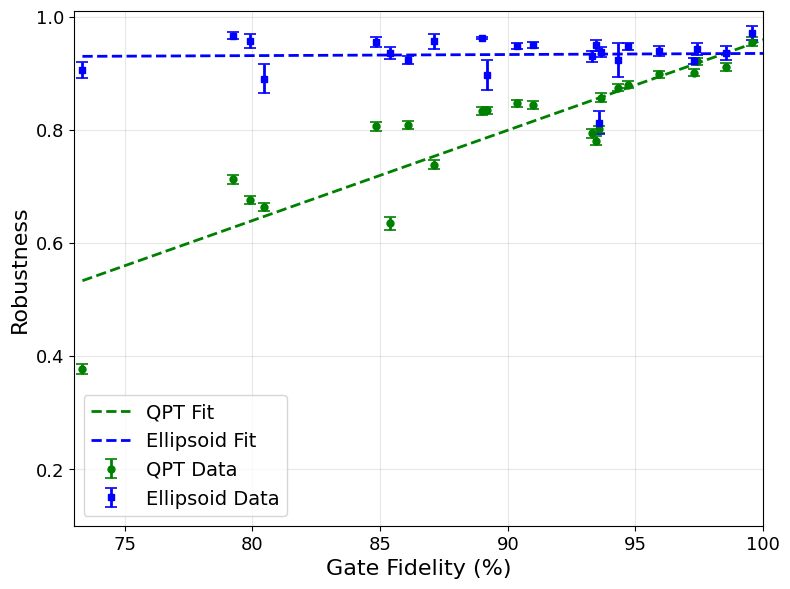


Fitted Results (x in percentage scale [85, 100])

QPT:
  y = 0.002093 * x + 0.742352
  OR: y = 0.209261 * x + 0.742352  (x in [0, 1])

Ellipsoid:
  y = 0.000025 * x + 0.932232
  OR: y = 0.002527 * x + 0.932232  (x in [0, 1])


In [7]:
# Convert to percentage scale for plotting (multiply by 100)
x_plot = x_data * 100
x_fit_plot = x_fit * 100

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot QPT data
ax.errorbar(x_plot, QPT_y, yerr=QPT_err,
                    linestyle='none', fmt='o', markersize=5, markerfacecolor='green', 
                    markeredgecolor='green', ecolor='green', elinewidth=2, capsize=4, capthick=1.2,
                    label='QPT Data')
ax.plot(x_fit_plot, QPT_y_fit, 'g--', linewidth=2, label='QPT Fit')

# Plot Ellipsoid data
ax.errorbar(x_plot, ellipsoid_y, yerr=ellipsoid_err,
                    linestyle='none', fmt='s', markersize=5, markerfacecolor='blue', 
                    markeredgecolor='blue', ecolor='blue', elinewidth=2, capsize=4, capthick=1.2,
                    label='Ellipsoid Data')
ax.plot(x_fit_plot, ellipsoid_y_fit, 'b--', linewidth=2, label='Ellipsoid Fit')

# Customize plot
ax.set_xlim(73, 100)
ax.set_ylim(0.1, 1.01)
ax.set_xlabel('Gate Fidelity (%)', fontsize=16)
ax.set_ylabel('Robustness', fontsize=16)
ax.tick_params(axis='x', labelsize=13) 
ax.tick_params(axis='y', labelsize=13) 
# ax.set_xticks([87, 91 ,95, 99])
# ax.set_yticks([0.64, 0.75, 0.86, 0.97])
ax.grid(True, alpha=0.3)
ax.legend(fontsize=14)

plt.tight_layout()
plt.show()

# Print fit results
print(f"\n{'='*60}")
print(f"Fitted Results (x in percentage scale [85, 100])")
print(f"{'='*60}")
a_QPT = p_QPT.coef[1] / 100
b_QPT = p_QPT.coef[0]
print(f"\nQPT:")
print(f"  y = {a_QPT:.6f} * x + {b_QPT:.6f}")
print(f"  OR: y = {p_QPT.coef[1]:.6f} * x + {b_QPT:.6f}  (x in [0, 1])")

a_ellipsoid = p_ellipsoid.coef[1] / 100
b_ellipsoid = p_ellipsoid.coef[0]
print(f"\nEllipsoid:")
print(f"  y = {a_ellipsoid:.6f} * x + {b_ellipsoid:.6f}")
print(f"  OR: y = {p_ellipsoid.coef[1]:.6f} * x + {b_ellipsoid:.6f}  (x in [0, 1])")
print(f"{'='*60}")

In [8]:
def ideal_fidelity(alpha):
    return np.cos(alpha*np.pi/2) * (1 + np.cos(alpha*np.pi/2)) / 2
def ideal_robustness(alpha):
    return np.cos(alpha*np.pi/2)**2+ np.cos(alpha*np.pi/2) - 1

## Save Figure

In [134]:
# Optional: Save figure to file
# Uncomment and modify the path as needed

fig.savefig(
    "/Users/jackchao/Desktop/Project/Phd_thesis/CH5_5GZdemonstration/data/Quantum_memory/paper_fig/Fig2_referee.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
    facecolor="none",   
)
print("Figure saved successfully!")

Figure saved successfully!
